# Fetch the data

In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
import seaborn as sns
import tensorflow as tf


In [67]:
test_file_person_paths  = [
'/Users/shivakumarbiru/Desktop/individual_project/dataset/test_data/person_test/adc_halfsleeves_p_lowseat.csv'
 ]
# test_file_unoccupied_paths=[
# '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/unoccupied_test/adc_50cm from top.txt',
# '/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/unoccupied_test/adc_100cm from top.txt'
# ]


In [68]:
dfs = []

for file in test_file_person_paths:
    df = pd.read_csv(file, header=None, index_col=False)
    df["label"]=1
    dfs.append(df)
    print(file)

combined_person_df_test = pd.concat(dfs, ignore_index=True)
combined_person_df_test

/Users/shivakumarbiru/Desktop/individual_project/rfc/dataset/test_data/person_test/adc_halfsleeves_p_lowseat.csv


,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,label
0,64,32768,1,1,512,0,1953125,12,0.0,3397,...,5,-1,0,-2,-1,-4,4,-3,4,1
1,64,32768,1,1,512,0,1953125,12,0.0,3447,...,9,12,8,7,5,15,10,6,5,1
2,64,32768,1,1,512,0,1953125,12,0.0,3470,...,-7,-1,-8,-10,-10,-7,-1,5,-3,1
3,64,32768,1,1,512,0,1953125,12,0.0,3515,...,-3,-3,-10,-16,-10,-10,-7,-7,-7,1
4,64,32768,1,1,512,0,1953125,12,0.0,7021,...,-39,-41,-36,-48,-42,-48,-42,-43,-44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,64,32768,1,1,512,0,1953125,12,0.0,3249,...,-12,-12,-10,-16,-13,-17,-10,-10,-4,1
218,64,32768,1,1,512,0,1953125,12,0.0,3219,...,-11,-20,-5,-19,-8,-11,-4,-2,-15,1
219,64,32768,1,1,512,0,1953125,12,0.0,3197,...,-12,-15,-4,-9,-7,-7,-5,-7,-7,1
220,64,32768,1,1,512,0,1953125,12,0.0,3217,...,10,5,6,12,16,23,13,7,9,1


In [69]:
# dfs = []

# # Loop through the file paths and append each DataFrame to the list
# for file in test_file_unoccupied_paths:
#     df = pd.read_csv(file, header=None, index_col=False,sep='\t')
#     df["label"]=0
#     dfs.append(df)

# # Concatenate all the DataFrames in the list
# combined_unoccupied_df_test = pd.concat(dfs, ignore_index=True)
# combined_unoccupied_df_test

In [70]:
# Get the shape of the DataFrame


In [71]:
# combined_df_row_test = pd.concat([combined_person_df_test, combined_unoccupied_df_test], ignore_index=True)

# print("Row-wise Concatenation:")
# print(combined_df_row_test)

In [72]:
# Select from the 17th column to the end
# adc_data_selected_columns_for_person = combined_df_row_test.iloc[:, 16:]  # Python uses 0-based indexing
# adc_data_selected_columns_for_person.head()

adc_data_selected_columns_for_person = combined_person_df_test.iloc[:, 16:]  # Python uses 0-based indexing
adc_data_selected_columns_for_person.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,label
0,59,50,62,58,57,56,62,63,59,54,...,5,-1,0,-2,-1,-4,4,-3,4,1
1,-29,-29,-25,-28,-25,-29,-28,-31,-24,-39,...,9,12,8,7,5,15,10,6,5,1
2,-47,-38,-49,-44,-37,-41,-43,-41,-51,-42,...,-7,-1,-8,-10,-10,-7,-1,5,-3,1
3,10,10,14,7,11,5,9,4,12,10,...,-3,-3,-10,-16,-10,-10,-7,-7,-7,1
4,-24,-29,-19,-24,-20,-24,-24,-19,-26,-20,...,-39,-41,-36,-48,-42,-48,-42,-43,-44,1


In [73]:
test_features_df = adc_data_selected_columns_for_person.drop(columns='label')  # Drop the 'label' column to get features
test_labels_df = adc_data_selected_columns_for_person['label']  # Extract the 'label' column to get labels

# Convert the ADC Data to FFT

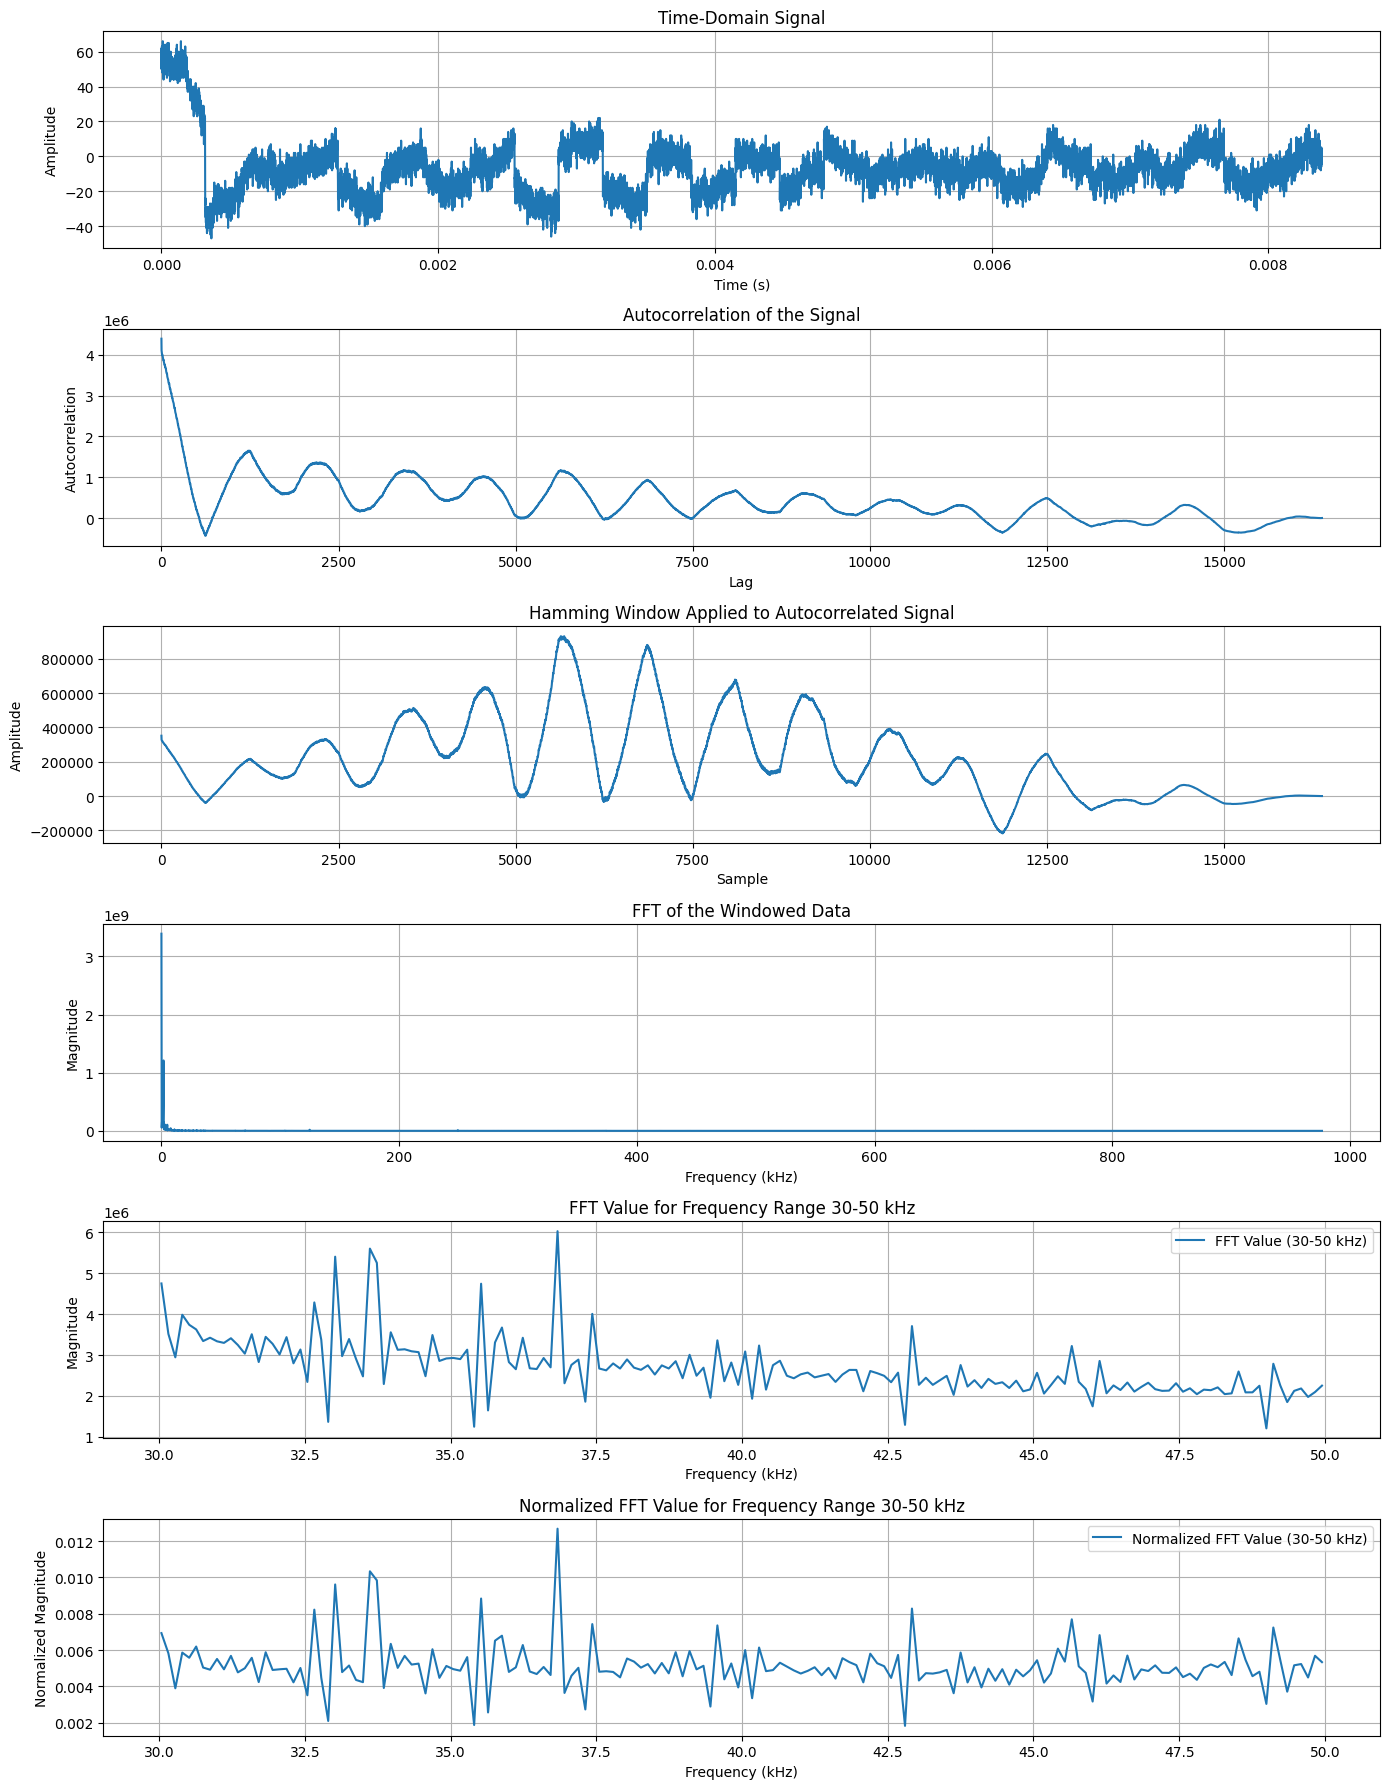

In [74]:

adc_array = test_features_df.to_numpy()

# Define the sampling frequency
sampling_rate = 1953125  # Use the actual sampling rate

# Autocorrelation function
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

# Apply Hamming window function
def apply_hamming_window(data):
    window = np.hamming(len(data))
    return data * window

# Initialize lists to store the results
fft_values_list = []
frequency_list = []

# Perform processing for each row
for row in adc_array:
    # Step 1: Compute the autocorrelation
    autocorr_result = autocorrelation(row)
    
    # Step 2: Apply the Hamming window
    windowed_data = apply_hamming_window(autocorr_result)
    
    # Step 3: Compute the FFT
    fft_result = np.fft.fft(windowed_data)
    
    # Frequency bins
    freq = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
    
    # Extract positive frequencies and corresponding FFT values
    positive_freqs = freq[:len(freq) // 2] / 1000  # Convert to kHz
    positive_fft_values = np.abs(fft_result[:len(freq) // 2])
    
    # Append the results to the lists
    if len(frequency_list) == 0:
        frequency_list = positive_freqs  # Store frequency values only once
    fft_values_list.append(positive_fft_values)

# Convert lists to numpy arrays
fft_values = np.array(fft_values_list)

# Create a DataFrame
fft_df = pd.DataFrame(fft_values, columns=frequency_list)

# Define the specific frequency range in kHz
range_min, range_max = 30, 50

# Filter data for the specified range
filtered_columns = [col for col in fft_df.columns if range_min <= col <= range_max]
filtered_data = fft_df[filtered_columns]


# Normalize the filtered data
normalized_data = (filtered_data - filtered_data.min()) / (filtered_data.max() - filtered_data.min())


# Plot the results
plt.figure(figsize=(14, 18))

# Plot the time-domain signal
plt.subplot(6, 1, 1)
plt.plot(np.arange(adc_array.shape[1]) / sampling_rate, adc_array[0, :])  # Plotting the first row as an example
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the autocorrelation of the time-domain signal
plt.subplot(6, 1, 2)
plt.plot(autocorrelation(adc_array[0, :]))
plt.title('Autocorrelation of the Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)

# Plot the Hamming window applied to the autocorrelated signal
plt.subplot(6, 1, 3)
plt.plot(apply_hamming_window(autocorrelation(adc_array[0, :])))
plt.title('Hamming Window Applied to Autocorrelated Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the FFT of the windowed data
plt.subplot(6, 1, 4)
plt.plot(frequency_list, fft_df.iloc[0, :])
plt.title('FFT of the Windowed Data')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot the FFT values in the 30-50 kHz range
plt.subplot(6, 1, 5)
plt.plot(filtered_data.columns, filtered_data.iloc[0, :], label='FFT Value (30-50 kHz)')
plt.title('FFT Value for Frequency Range 30-50 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot the normalized FFT values in the 30-50 kHz range
plt.subplot(6, 1, 6)
plt.plot(normalized_data.columns, normalized_data.iloc[0, :], label='Normalized FFT Value (30-50 kHz)')
plt.title('Normalized FFT Value for Frequency Range 30-50 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()





In [75]:

normalized_data.head()

,30.040741,30.159950,30.279160,30.398369,30.517578,30.636787,30.755997,30.875206,30.994415,31.113625,...,48.875809,48.995018,49.114227,49.233437,49.352646,49.471855,49.591064,49.710274,49.829483,49.948692
0,0.006935,0.005827,0.003897,0.005862,0.005580,0.006196,0.005041,0.004922,0.005513,0.004943,...,0.004810,0.003040,0.007242,0.005455,0.003712,0.005163,0.005233,0.004493,0.005688,0.005338
1,0.004944,0.005807,0.004883,0.004791,0.004867,0.005432,0.005612,0.004718,0.005458,0.005190,...,0.003807,0.007142,0.005332,0.005260,0.004702,0.005002,0.005364,0.004749,0.005945,0.004764
2,0.005171,0.006627,0.009029,0.006427,0.006827,0.007765,0.006810,0.006650,0.006545,0.007403,...,0.007364,0.006457,0.006347,0.008312,0.006067,0.005505,0.008781,0.005003,0.008594,0.004815
3,0.003159,0.004339,0.003544,0.002653,0.004520,0.004766,0.003853,0.003034,0.004573,0.003336,...,0.003810,0.004274,0.004113,0.003791,0.003084,0.003434,0.004377,0.003633,0.003946,0.003935
4,0.003708,0.005534,0.003579,0.003563,0.004936,0.004094,0.004956,0.004967,0.004099,0.004672,...,0.004364,0.004867,0.005030,0.004128,0.004005,0.003921,0.004955,0.003938,0.005138,0.004112


## RFC

Accuracy: <function accuracy_score at 0x12a13bee0>
Precision: 1.0
Recall: 0.9864864864864865
F1-score: 0.9931972789115646
Accuracy (Formula): 0.9864864864864865
Precision (Formula): 1.0
Recall (Formula): 0.9864864864864865
F1-score (Formula): 0.9931972789115647
Accuracy (Direct): 0.9864864864864865
Precision (Direct): 1.0
Recall (Direct): 0.9864864864864865
F1-score (Direct): 0.9931972789115646


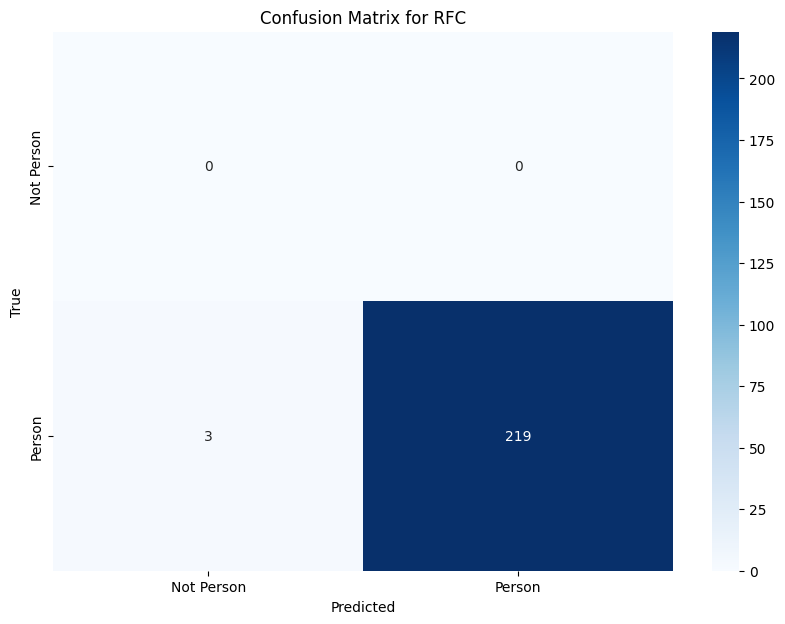

In [76]:
model_rfc = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/models/rf_classifier')
y_pred = model_rfc.predict(normalized_data)
precision = precision_score(test_labels_df, y_pred)
recall = recall_score(test_labels_df, y_pred)
f1 = f1_score(test_labels_df, y_pred)

print(f"Accuracy: {accuracy_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

    # Calculate accuracy
conf_matrix = confusion_matrix(test_labels_df, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate accuracy, precision, recall, and F1 score using formulas
accuracy_formula = (tp + tn) / (tp + tn + fp + fn)
precision_formula = tp / (tp + fp)
recall_formula = tp / (tp + fn)
f1_formula = 2 * (precision_formula * recall_formula) / (precision_formula + recall_formula)

# Calculate accuracy, precision, recall, and F1 score using sklearn metrics
accuracy_direct = accuracy_score(test_labels_df, y_pred)
precision_direct = precision_score(test_labels_df, y_pred)
recall_direct = recall_score(test_labels_df, y_pred)
f1_direct = f1_score(test_labels_df, y_pred)

print(f"Accuracy (Formula): {accuracy_formula}")
print(f"Precision (Formula): {precision_formula}")
print(f"Recall (Formula): {recall_formula}")
print(f"F1-score (Formula): {f1_formula}")

print(f"Accuracy (Direct): {accuracy_direct}")
print(f"Precision (Direct): {precision_direct}")
print(f"Recall (Direct): {recall_direct}")
print(f"F1-score (Direct): {f1_direct}")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Person', 'Person'], yticklabels=['Not Person', 'Person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RFC')
plt.show()


## SVM

Accuracy: 0.9864864864864865
Precision: 1.0
Recall: 0.9864864864864865
F1 Score: 0.9931972789115646
Confusion Matrix:
 [[  0   0]
 [  3 219]]


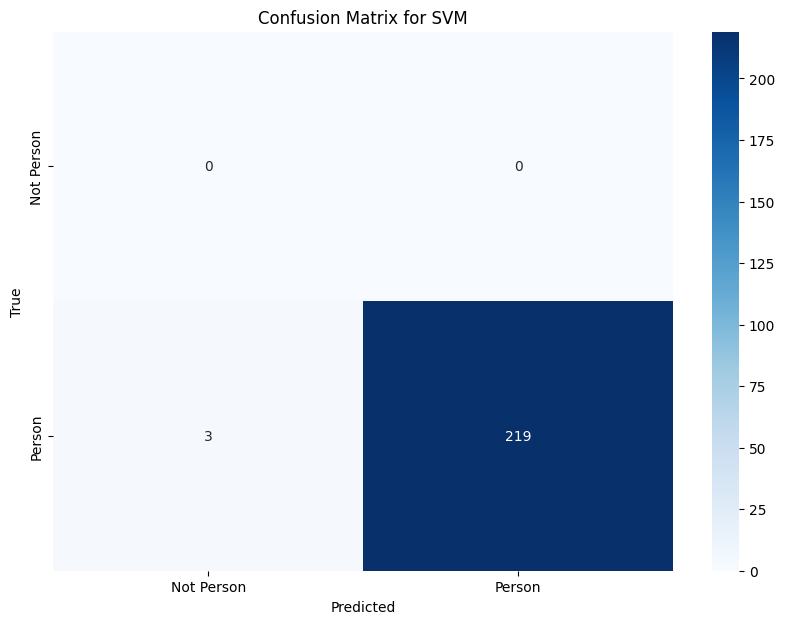

In [77]:
loaded_model = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/models/svm1_model')

y_pred_loaded = loaded_model.predict(normalized_data)

accuracy = accuracy_score(test_labels_df, y_pred_loaded)
precision = precision_score(test_labels_df, y_pred_loaded)
recall = recall_score(test_labels_df, y_pred_loaded)
f1 = f1_score(test_labels_df, y_pred_loaded)
conf_matrix = confusion_matrix(test_labels_df, y_pred_loaded)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Person', 'Person'], yticklabels=['Not Person', 'Person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


## Logistic regression

Logistic Regression Accuracy: 0.9864864864864865
Confusion Matrix:
 [[  0   0]
 [  3 219]]
Accuracy: 0.9864864864864865
Precision: 1.0
Recall: 0.9864864864864865
F1 Score: 0.9931972789115646
Confusion Matrix:
 [[  0   0]
 [  3 219]]


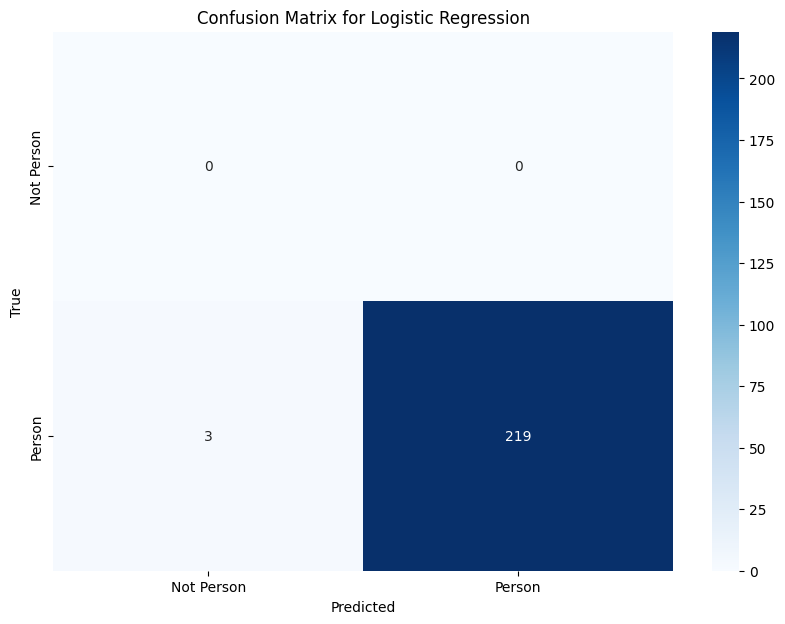

In [78]:

import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the saved model
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix





# Load the saved model
loaded_model = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/models/logistic_regression_model.pkl')

# Load the scaler
scaler = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/rfc/models/scaler.pkl')

# Feature scaling
X_test_scaled = scaler.transform(normalized_data)  # Apply the same scaling as used in training

# Predict using the loaded model
y_pred = loaded_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(test_labels_df, y_pred)
conf_matrix = confusion_matrix(test_labels_df, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Person', 'Person'], yticklabels=['Not Person', 'Person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## XGB

XGBoost Accuracy: 0.9864864864864865
Confusion Matrix:
 [[  0   0]
 [  3 219]]
Accuracy: 0.9864864864864865
Precision: 1.0
Recall: 0.9864864864864865
F1 Score: 0.9931972789115646
Confusion Matrix:
 [[  0   0]
 [  3 219]]


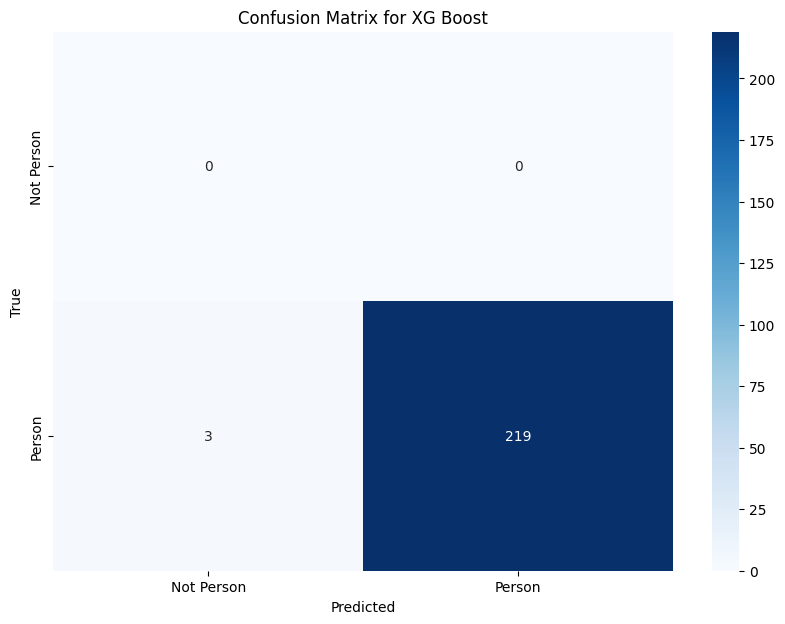

In [79]:
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the saved model
model_path = '/Users/shivakumarbiru/Desktop/individual_project/models/best_xgb_model_early_stopping.pkl'  # Replace with your actual model file name if different
xgb_classifier = joblib.load(model_path)

# Make predictions with the loaded model
y_pred = xgb_classifier.predict(normalized_data)

# Evaluate the predictions
print("XGBoost Accuracy:", accuracy_score(test_labels_df, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_labels_df, y_pred))

conf_matrix = confusion_matrix(test_labels_df, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Person', 'Person'], yticklabels=['Not Person', 'Person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XG Boost')
plt.show()


## GBM

GBM model loaded from gbm_model.pkl
Gradient Boosting Classifier Results:
Accuracy: 0.9594594594594594
Confusion Matrix:
[[  0   0]
 [  9 213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98       222

    accuracy                           0.96       222
   macro avg       0.50      0.48      0.49       222
weighted avg       1.00      0.96      0.98       222

Accuracy: 0.9594594594594594
Precision: 1.0
Recall: 0.9864864864864865
F1 Score: 0.9931972789115646


/Users/shivakumarbiru/Desktop/individual_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shivakumarbiru/Desktop/individual_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shivakumarbiru/Desktop/individual_project/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

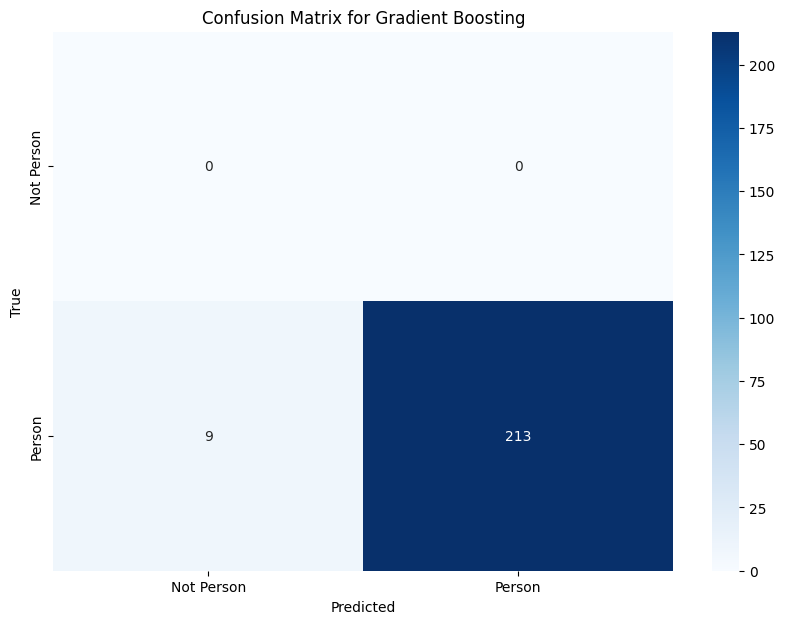

In [80]:

import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the model
loaded_gbm_model = joblib.load('/Users/shivakumarbiru/Desktop/individual_project/models/gbm_model.pkl')
print('GBM model loaded from gbm_model.pkl')


# Test the model
y_gbm_pred = loaded_gbm_model.predict(normalized_data)

# Evaluate the model
accuracy = accuracy_score(test_labels_df, y_gbm_pred)
conf_matrix = confusion_matrix(test_labels_df, y_gbm_pred)
report = classification_report(test_labels_df, y_gbm_pred)

print('Gradient Boosting Classifier Results:')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Person', 'Person'], yticklabels=['Not Person', 'Person'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()
